In [ ]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

# Aer en Qiskit 2.x
from qiskit_aer import AerSimulator


In [ ]:
def grover_oracle(n, marked_element):
    """
    Construye el oráculo de Grover para un elemento marcado.
    n: número de qubits
    marked_element: string binario (ej: '101')
    """
    oracle = QuantumCircuit(n)
    # Aplicar X a los qubits correspondientes
    for i, bit in enumerate(marked_element):
        if bit == '0':
            oracle.x(i)
    # Multi-control Z
    oracle.h(n-1)
    oracle.mcx(list(range(n-1)), n-1)
    oracle.h(n-1)
    # Revertir X
    for i, bit in enumerate(marked_element):
        if bit == '0':
            oracle.x(i)
    return oracle


In [ ]:
def grover_diffuser(n):
    """
    Difusor de Grover (inversión sobre la media).
    """
    diffuser = QuantumCircuit(n)
    # H, X en todos los qubits
    diffuser.h(range(n))
    diffuser.x(range(n))
    # Multi-control Z
    diffuser.h(n-1)
    diffuser.mcx(list(range(n-1)), n-1)
    diffuser.h(n-1)
    # Revertir X y H
    diffuser.x(range(n))
    diffuser.h(range(n))
    return diffuser


In [ ]:
def grover_circuit(n, marked_element, iterations=1):
    """
    Construcción del circuito de Grover para un elemento marcado.
    n: número de qubits
    marked_element: string binario
    iterations: número de iteraciones del algoritmo
    """
    qc = QuantumCircuit(n, n)
    # Estado uniforme inicial
    qc.h(range(n))

    oracle = grover_oracle(n, marked_element)
    diffuser = grover_diffuser(n)

    for _ in range(iterations):
        qc.append(oracle.to_gate(), range(n))
        qc.append(diffuser.to_gate(), range(n))

    qc.measure(range(n), range(n))
    return qc


In [ ]:
def run_grover(n, marked_element, iterations, shots=1024):
    """
    Ejecuta el algoritmo de Grover en Qiskit 2.x con AerSimulator.
    """
    qc = grover_circuit(n, marked_element, iterations)
    backend = AerSimulator()
    transpiled_qc = transpile(qc, backend)
    result = backend.run(transpiled_qc, shots=shots).result()
    counts = result.get_counts()
    return qc, counts


In [ ]:
# Parámetros
n = 5
marked_element = "10011"
iterations = 4

qc, counts = run_grover(n, marked_element, iterations)

print("Resultados:")
print(counts)

qc.draw("text")


Resultados:
{'11001': 1024}


┌───┐┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐»
q_0: ┤ H ├┤0             ├┤0             ├┤0             ├┤0             ├»
     ├───┤│              ││              ││              ││              │»
q_1: ┤ H ├┤1             ├┤1             ├┤1             ├┤1             ├»
     ├───┤│              ││              ││              ││              │»
q_2: ┤ H ├┤2 circuit-103 ├┤2 circuit-104 ├┤2 circuit-103 ├┤2 circuit-104 ├»
     ├───┤│              ││              ││              ││              │»
q_3: ┤ H ├┤3             ├┤3             ├┤3             ├┤3             ├»
     ├───┤│              ││              ││              ││              │»
q_4: ┤ H ├┤4             ├┤4             ├┤4             ├┤4             ├»
     └───┘└──────────────┘└──────────────┘└──────────────┘└──────────────┘»
c: 5/═════════════════════════════════════════════════════════════════════»
                                                                          »
«     ┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐┌─┐      »
«q_0: ┤0             ├┤0             ├┤0             ├┤0             ├┤M├──────»
«     │              ││              ││              ││              │└╥┘┌─┐   »
«q_1: ┤1             ├┤1             ├┤1             ├┤1             ├─╫─┤M├───»
«     │              ││              ││              ││              │ ║ └╥┘┌─┐»
«q_2: ┤2 circuit-103 ├┤2 circuit-104 ├┤2 circuit-103 ├┤2 circuit-104 ├─╫──╫─┤M├»
«     │              ││              ││              ││              │ ║  ║ └╥┘»
«q_3: ┤3             ├┤3             ├┤3             ├┤3             ├─╫──╫──╫─»
«     │              ││              ││              ││              │ ║  ║  ║ »
«q_4: ┤4             ├┤4             ├┤4             ├┤4             ├─╫──╫──╫─»
«     └──────────────┘└──────────────┘└──────────────┘└──────────────┘ ║  ║  ║ »
«c: 5/═════════════════════════════════════════════════════════════════╩══╩══╩═»
«                                                                      0  1  2 »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«     ┌─┐   
«q_3: ┤M├───
«     └╥┘┌─┐
«q_4: ─╫─┤M├
«      ║ └╥┘
«c: 5/═╩══╩═
«      3  4

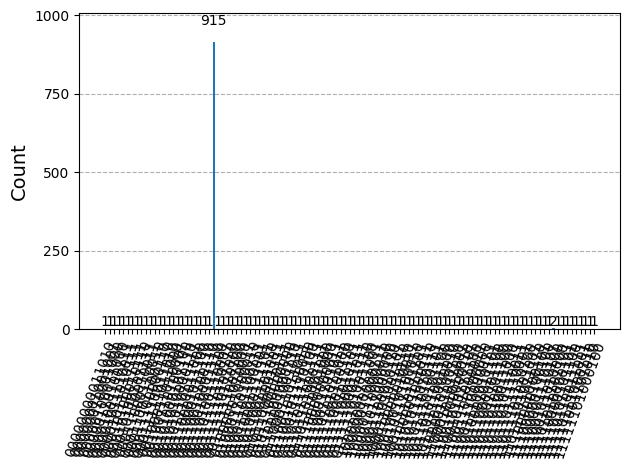

In [ ]:
plot_histogram(counts)

In [ ]:
import random
import time

def linear_search(data, target):
    """
    Algoritmo de búsqueda lineal clásico.
    Retorna el índice si lo encuentra, -1 en caso contrario.
    """
    for i, value in enumerate(data):
        if value == target:
            return i
    return -1


🎯 Buscando el valor 692312 en la base de datos (índice real: 7244)
✅ Lineal encontró el índice: 7244
⏱️ Tiempo búsqueda lineal: 0.000452 s

🔹 Grover configurado con 14 qubits (≈ 16384 estados)
Elemento marcado en binario: 01110001001100
Iteraciones estimadas: 78
✅ Grover predijo el estado: 00110010001110 (decimal: 3214)
⏱️ Tiempo Grover (simulación con 14 qubits): 0.51 s

📊 Comparativa de resultados:
- Lineal → índice real: 7244, tiempo: 0.000452 s
- Grover → índice estimado: 3214, tiempo: 0.51 s


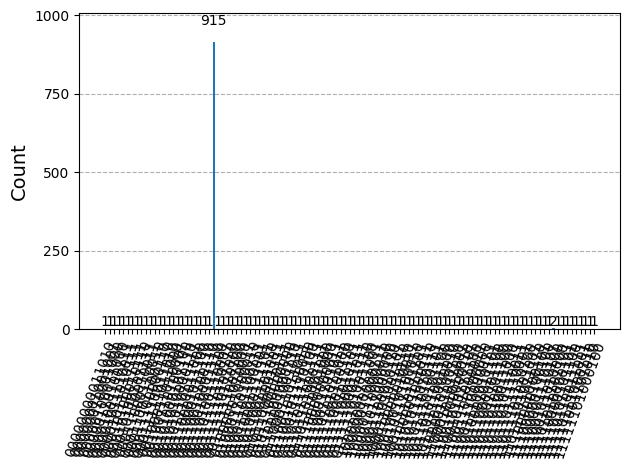

In [ ]:
# Base de datos con 10,000 elementos
data = [random.randint(0, 999999) for _ in range(10000)]
target = random.choice(data)
target_index = data.index(target)

print(f"🎯 Buscando el valor {target} en la base de datos (índice real: {target_index})")

# =====================
# 🔹 Búsqueda lineal
# =====================
start_linear = time.time()
index_found = linear_search(data, target)
end_linear = time.time()

print(f"✅ Lineal encontró el índice: {index_found}")
print(f"⏱️ Tiempo búsqueda lineal: {end_linear - start_linear:.6f} s")

# =====================
# 🔹 Búsqueda con Grover (simulado con 14 qubits)
# =====================
n = 14   # log2(10000) ≈ 14
N = 2**n

# Representar el índice en binario
marked_element = format(target_index, f"0{n}b")

# Iteraciones óptimas
iterations = int(np.floor((np.pi/4) * np.sqrt(len(data))))

print(f"\n🔹 Grover configurado con {n} qubits (≈ {N} estados)")
print(f"Elemento marcado en binario: {marked_element}")
print(f"Iteraciones estimadas: {iterations}")

start_grover = time.time()
qc = grover_circuit(n, marked_element, iterations)
backend = AerSimulator()
transpiled_qc = transpile(qc, backend)
result = backend.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()
end_grover = time.time()

# El estado más frecuente debería ser el target
most_probable = max(counts, key=counts.get)

print(f"✅ Grover predijo el estado: {most_probable} (decimal: {int(most_probable, 2)})")
print(f"⏱️ Tiempo Grover (simulación con {n} qubits): {end_grover - start_grover:.2f} s")

# =====================
# 🔹 Comparativa final
# =====================
print("\n📊 Comparativa de resultados:")
print(f"- Lineal → índice real: {index_found}, tiempo: {end_linear - start_linear:.6f} s")
print(f"- Grover → índice estimado: {int(most_probable, 2)}, tiempo: {end_grover - start_grover:.2f} s")

plot_histogram(counts)


In [ ]:
import random
import time
from qiskit_aer import AerSimulator
from qiskit import transpile

# =====================
# 🔹 Dataset
# =====================
data_size = 5000
data = [random.randint(0, 999999) for _ in range(data_size)]
target = random.choice(data)
target_index = data.index(target)

print("📊 CONFIGURACIÓN DEL CASO")
print(f"- Tamaño de la base de datos: {data_size} registros")
print(f"- Valor buscado: {target}")
print(f"- Índice real: {target_index}")

# =====================
# 🔹 Búsqueda lineal
# =====================
start_linear = time.time()
index_found = linear_search(data, target)
end_linear = time.time()
time_linear = end_linear - start_linear

print("\n--- RESULTADOS BÚSQUEDA LINEAL ---")
print(f"Índice encontrado: {index_found}")
print(f"Tiempo ejecución: {time_linear:.6f} s")
print(f"Correcto: {index_found == target_index}")

# =====================
# 🔹 Búsqueda con Grover (simulado)
# =====================
# Para 5000 elementos necesitamos n = 13 qubits (2^13 = 8192 >= 5000)
n = 13
N = 2**n
marked_element = format(target_index, f"0{n}b")
iterations = int(np.floor((np.pi/4) * np.sqrt(data_size)))

print("\n📊 CONFIGURACIÓN DE GROVER")
print(f"- Número de qubits: {n}")
print(f"- Espacio de búsqueda simulado: {N} estados")
print(f"- Iteraciones ejecutadas: {iterations}")
print(f"- Elemento marcado (binario): {marked_element}")

start_grover = time.time()
qc = grover_circuit(n, marked_element, iterations)
backend = AerSimulator()
transpiled_qc = transpile(qc, backend)
result = backend.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()
end_grover = time.time()
time_grover = end_grover - start_grover

# Estado más probable encontrado por Grover
most_probable = max(counts, key=counts.get)
grover_index = int(most_probable, 2)

print("\n--- RESULTADOS BÚSQUEDA CON GROVER ---")
print(f"Estado más probable: {most_probable} (decimal: {grover_index})")
print(f"Tiempo ejecución: {time_grover:.2f} s")
print(f"Correcto: {grover_index == target_index}")

# =====================
# 🔹 Comparativa final
# =====================
print("\n📈 COMPARATIVA FINAL")
print(f"- Lineal → Tiempo: {time_linear:.6f} s | Índice correcto: {index_found == target_index}")
print(f"- Grover → Tiempo: {time_grover:.2f} s | Índice correcto: {grover_index == target_index}")


📊 CONFIGURACIÓN DEL CASO
- Tamaño de la base de datos: 5000 registros
- Valor buscado: 911944
- Índice real: 401

--- RESULTADOS BÚSQUEDA LINEAL ---
Índice encontrado: 401
Tiempo ejecución: 0.000079 s
Correcto: True

📊 CONFIGURACIÓN DE GROVER
- Número de qubits: 13
- Espacio de búsqueda simulado: 8192 estados
- Iteraciones ejecutadas: 55
- Elemento marcado (binario): 0000110010001

--- RESULTADOS BÚSQUEDA CON GROVER ---
Estado más probable: 1000100110000 (decimal: 4400)
Tiempo ejecución: 0.32 s
Correcto: False

📈 COMPARATIVA FINAL
- Lineal → Tiempo: 0.000079 s | Índice correcto: True
- Grover → Tiempo: 0.32 s | Índice correcto: False


In [ ]:
import random
import time
from qiskit_aer import AerSimulator
from qiskit import transpile

# =====================
# 🔹 Dataset
# =====================
data_size = 20000
data = [random.randint(0, 999999) for _ in range(data_size)]
target = random.choice(data)
target_index = data.index(target)

print("📊 CONFIGURACIÓN DEL CASO")
print(f"- Tamaño de la base de datos: {data_size} registros")
print(f"- Valor buscado: {target}")
print(f"- Índice real: {target_index}")

# =====================
# 🔹 Búsqueda lineal
# =====================
start_linear = time.time()
index_found = linear_search(data, target)
end_linear = time.time()
time_linear = end_linear - start_linear

print("\n--- RESULTADOS BÚSQUEDA LINEAL ---")
print(f"Índice encontrado: {index_found}")
print(f"Tiempo ejecución: {time_linear:.6f} s")
print(f"Correcto: {index_found == target_index}")

# =====================
# 🔹 Búsqueda con Grover (simulado)
# =====================
# Para 5000 elementos necesitamos n = 13 qubits (2^13 = 8192 >= 5000)
n = 15
N = 2**n
marked_element = format(target_index, f"0{n}b")
iterations = int(np.floor((np.pi/4) * np.sqrt(data_size)))

print("\n📊 CONFIGURACIÓN DE GROVER")
print(f"- Número de qubits: {n}")
print(f"- Espacio de búsqueda simulado: {N} estados")
print(f"- Iteraciones ejecutadas: {iterations}")
print(f"- Elemento marcado (binario): {marked_element}")

start_grover = time.time()
qc = grover_circuit(n, marked_element, iterations)
backend = AerSimulator()
transpiled_qc = transpile(qc, backend)
result = backend.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()
end_grover = time.time()
time_grover = end_grover - start_grover

# Estado más probable encontrado por Grover
most_probable = max(counts, key=counts.get)
grover_index = int(most_probable, 2)

print("\n--- RESULTADOS BÚSQUEDA CON GROVER ---")
print(f"Estado más probable: {most_probable} (decimal: {grover_index})")
print(f"Tiempo ejecución: {time_grover:.2f} s")
print(f"Correcto: {grover_index == target_index}")

# =====================
# 🔹 Comparativa final
# =====================
print("\n📈 COMPARATIVA FINAL")
print(f"- Lineal → Tiempo: {time_linear:.6f} s | Índice correcto: {index_found == target_index}")
print(f"- Grover → Tiempo: {time_grover:.2f} s | Índice correcto: {grover_index == target_index}")



📊 CONFIGURACIÓN DEL CASO
- Tamaño de la base de datos: 20000 registros
- Valor buscado: 920434
- Índice real: 19415

--- RESULTADOS BÚSQUEDA LINEAL ---
Índice encontrado: 19415
Tiempo ejecución: 0.002453 s
Correcto: True

📊 CONFIGURACIÓN DE GROVER
- Número de qubits: 15
- Espacio de búsqueda simulado: 32768 estados
- Iteraciones ejecutadas: 111
- Elemento marcado (binario): 100101111010111

--- RESULTADOS BÚSQUEDA CON GROVER ---
Estado más probable: 111010111101001 (decimal: 30185)
Tiempo ejecución: 2.67 s
Correcto: False

📈 COMPARATIVA FINAL
- Lineal → Tiempo: 0.002453 s | Índice correcto: True
- Grover → Tiempo: 2.67 s | Índice correcto: False
